Following the tutorial from https://github.com/x-y-zhao/BayLime

In [1]:
import os
import time
import shutil
import tensorflow.keras
from tensorflow.keras.applications import inception_v3 as inc_net
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries
from baylime import lime_image
from baylime import Grad_CAM
from baylime import evaluation
import csv
from baylime import calculate_posteriors
print('Notebook run using keras:', tensorflow.keras.__version__)
plt.rcParams['axes.grid'] = False

Notebook run using keras: 3.5.0


In [2]:
def mkdir(path):
    folder = os.path.exists(path)
    if not folder:
        os.makedirs(path)
    else:
        shutil.rmtree(path)
        os.mkdir(path)

In [3]:
inet_model = inc_net.InceptionV3(weights='imagenet')

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

mkdir('another_try_output')
fname = 'another_try_output'

images = transform_img_fn([os.path.join('data','cat_dog.jpg')])

In [4]:
deletion = evaluation.CausalMetric(inet_model,'del')
insertion = evaluation.CausalMetric(inet_model,'ins')


In [5]:
preds = inet_model.predict(images)
pred_label = decode_predictions(preds)[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


the number of features: 83


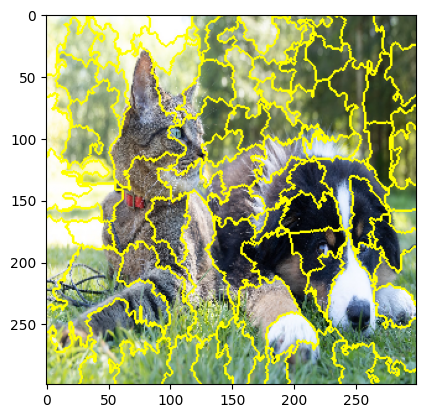

  0%|          | 0/200 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
using Bay_info_prior_fixed_lambda_fit_alpha option for model regressor
Convergence after  3  iterations
the alpha is 383.6846671841423
the lambda is 1000.0
the regulation term lambda/alpha is 2.6063069117121342


In [6]:
time1 = time.time()

explainer = lime_image.LimeImageExplainer(feature_selection='none', random_state= 66)#kernel_width=0.1

explanation = explainer.explain_instance(images[0], inet_model.predict,
                                         top_labels=1, hide_color=0, batch_size=15,
                                         num_samples= 200, model_regressor='BayesianRidge_inf_prior_fit_alpha', random_seed= 66)

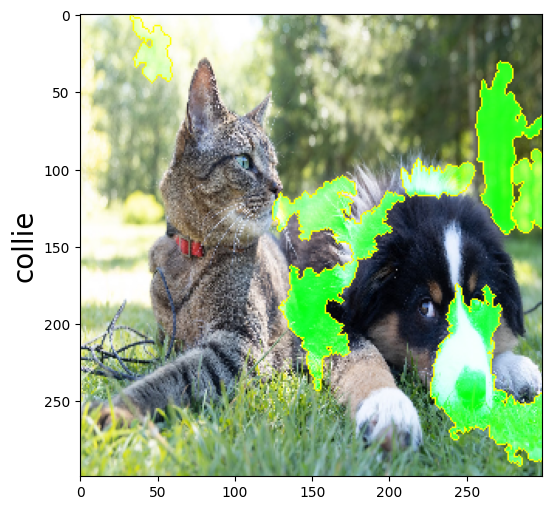

In [7]:
time2 = time.time()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], num_features=10, hide_rest=False)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(mark_boundaries(temp / 2 + 0.5, mask))
ax.set_ylabel(pred_label[0][1],fontsize=20)
fig.savefig(fname+'/Lime_exp.png',bbox_inches='tight')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━

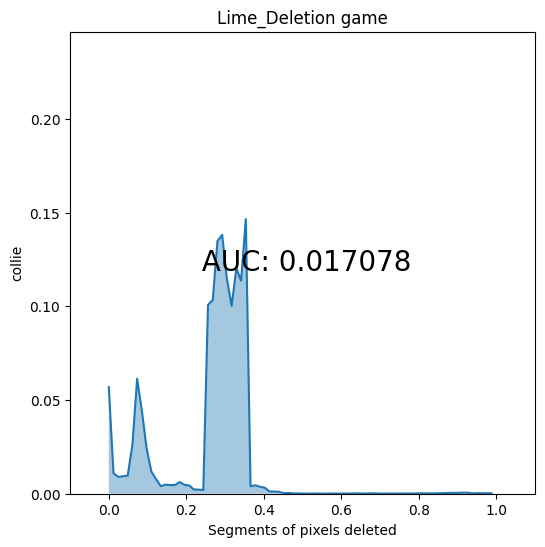

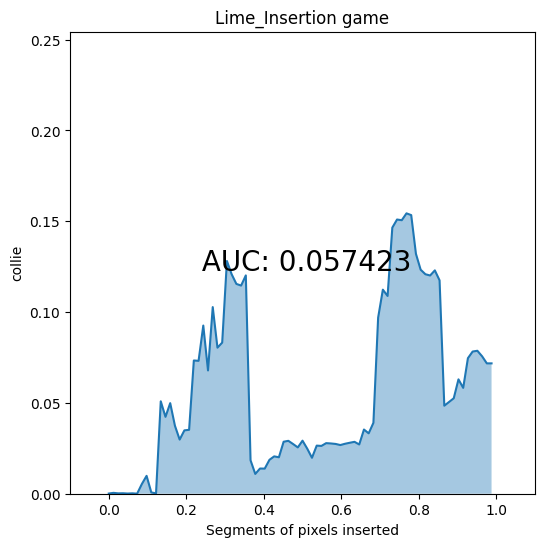

In [8]:
h1_del = deletion.single_run(images[0], explanation.local_exp[explanation.top_labels[0]], explanation.segments, explanation.top_labels[0], pred_label, 'Lime',fname)
h1_ins = insertion.single_run(images[0], explanation.local_exp[explanation.top_labels[0]], explanation.segments, explanation.top_labels[0], pred_label, 'Lime',fname)

In [9]:
time3 = time.time()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/var/folders/st/bfzyps496336s0p77vt620_00000gn/T/ipykernel_3156/3520723438.py:3: UserWarning: Warning: converting a masked element to nan.
  prior_knowledge = np.array(prior_knowledge)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

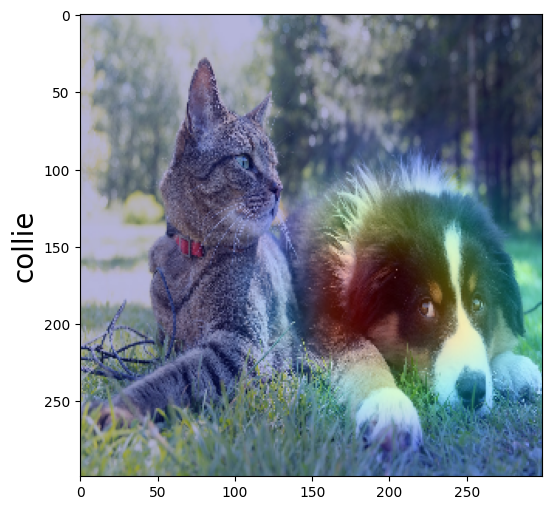

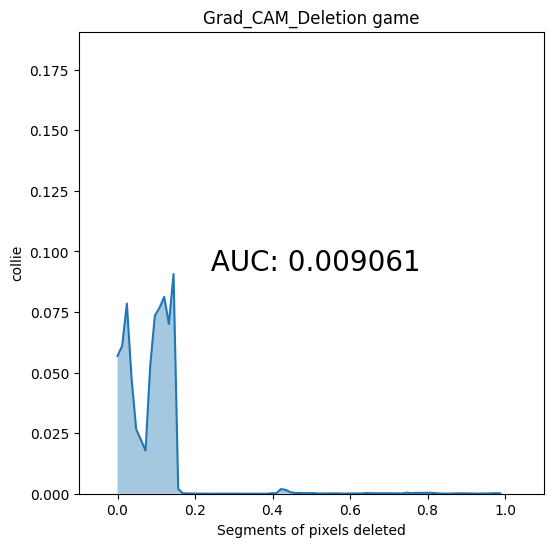

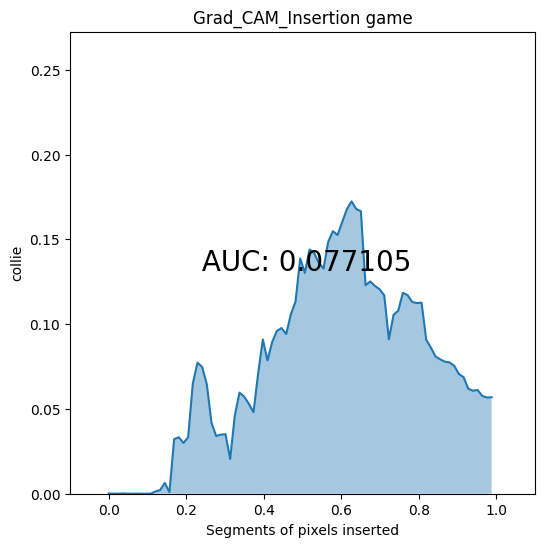

In [10]:
# extract the prior knowledge from grad-cam
prior_knowledge = Grad_CAM.extrat_prior(images[0],inet_model,explanation,fname,pred_label[0][1])
prior_knowledge = np.array(prior_knowledge)
prior_knowledge = np.nan_to_num(prior_knowledge, nan=0.0)
prior_exp = np.flip(np.argsort(abs(np.array(prior_knowledge))))
seg = explanation.segments

time4 = time.time()

h2_del = deletion.single_run(images[0], prior_exp, seg, explanation.top_labels[0], pred_label, 'Grad_CAM',fname)
h2_ins = insertion.single_run(images[0], prior_exp, seg, explanation.top_labels[0], pred_label, 'Grad_CAM',fname)


In [11]:
time5 = time.time()

# update the explanation with prior
alpha_init=1
lambda_init=1
with open('./posterior_configure.csv') as csv_file:
    csv_reader=csv.reader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 1:
            alpha_init=float(row[0])
            lambda_init=float(row[1])
        line_count=line_count+1

In [12]:
explanation = calculate_posteriors.get_posterior(explanation,prior_knowledge,
                                               hyper_para_alpha=alpha_init,
                                               hyper_para_lambda=lambda_init,
                                               label=explanation.top_labels[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━

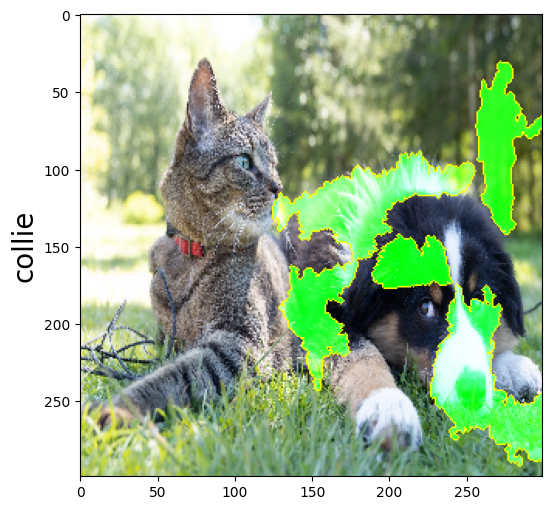

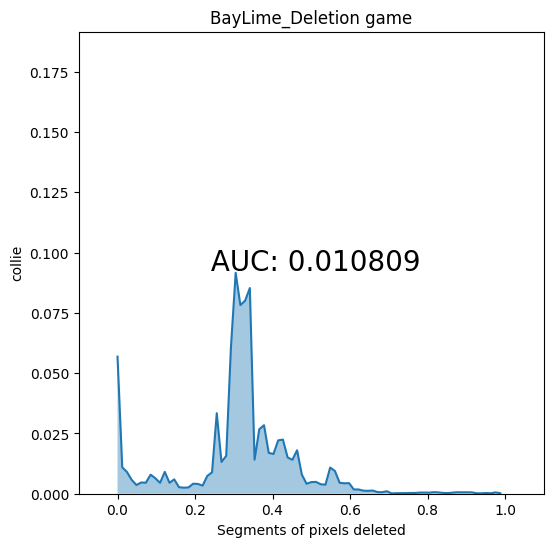

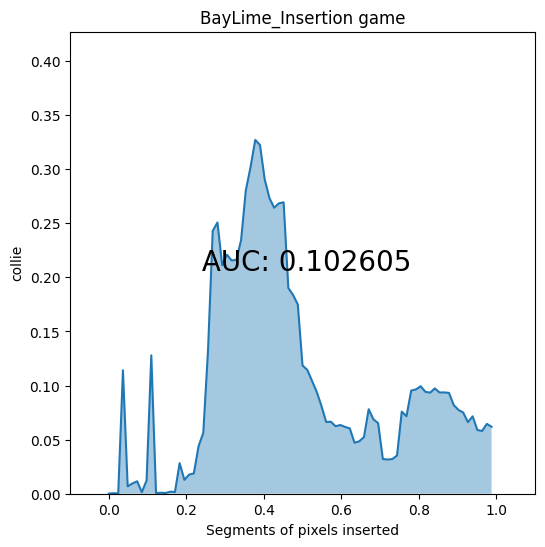

In [13]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], num_features=10, hide_rest=False)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(mark_boundaries(temp / 2 + 0.5, mask))
ax.set_ylabel(pred_label[0][1],fontsize=20)
fig.savefig(fname+'/BayLime_exp.png',bbox_inches='tight')

h3_del = deletion.single_run(images[0], explanation.local_exp[explanation.top_labels[0]], explanation.segments, explanation.top_labels[0], pred_label, 'BayLime',fname)
h3_ins = insertion.single_run(images[0], explanation.local_exp[explanation.top_labels[0]], explanation.segments, explanation.top_labels[0], pred_label, 'BayLime',fname)

In [14]:
time6 = time.time()

In [15]:
print('-----------------------------')
print('Lime deletion: ', h1_del)
print('Lime insertion: ', h1_ins)
print('Grad-CAM deletion: ', h2_del)
print('Grad-CAM insertion: ', h2_ins)
print('Baylime deletion: ', h3_del)
print('Baylime insertion: ', h3_ins)
print('-----------------------------')
print("grad_CAM:", time4 - time3, "s")
print("Lime :", time2 - time1, "s")
print("BayLime :", time6 - time5 + time2 - time1 + time4 - time3, "s")


-----------------------------
Lime deletion:  0.01707752718025011
Lime insertion:  0.05742256320993391
Grad-CAM deletion:  0.009061483585621938
Grad-CAM insertion:  0.07710528170933247
Baylime deletion:  0.01080875586724429
Baylime insertion:  0.10260491227952262
-----------------------------
grad_CAM: 1.2134079933166504 s
Lime : 10.349585771560669 s
BayLime : 26.1868839263916 s


In [17]:
from PIL import Image

# Paths to the three "exp" images in "another try" folder
image_paths = [
    "another_try_output/Grad_CAM_exp.png",
    "another_try_output/Lime_exp.png",
    "another_try_output/BayLime_exp.png"
]

# Load the images
images = [Image.open(image_path) for image_path in image_paths]

# Ensure all images have the same height for horizontal concatenation
common_height = min(img.height for img in images)
resized_images = [img.resize((int(img.width * common_height / img.height), common_height)) for img in images]

# Calculate the total width of the combined image
total_width = sum(img.width for img in resized_images)

# Create a blank canvas for the combined image
combined_image = Image.new("RGB", (total_width, common_height))

# Paste images side by side
x_offset = 0
for img in resized_images:
    combined_image.paste(img, (x_offset, 0))
    x_offset += img.width

# Save the combined image
combined_image.save("another_try_exp.png")

